# Classification_on_imbalanced_Data_using_python

In Machine Learning, imbalanced data refers to a situation in classification problems where the number of observations in each class significantly 
differs. In such datasets, one class (the majority class) vastly outnumbers the other class (the minority class). This imbalance can lead to biased 
models that favour the majority class, resulting in poor predictive performance on the minority class, which is often the class of greater interest.

Handling imbalanced data in classification tasks is a challenge that requires careful 
consideration of data preprocessing, resampling strategies, model choice and 
evaluation metrics. Below is the process that we will follow while performing 
classification on imbalanced datasets:

1. We Begin by analyzing the distribution of classes within our dataset to understand 
    the extent of the imbalance.
2. Determine the importance of each class in the context of our specific problem.
3. Increase the number of instances in the minority class by replicating them to 
    balance the class distribution.
4. Some algorithms, like tree-based methods, are less sensitive to class imbalance.
    Consider using these or ensemble methods like Random Forest or Gradient Boosted 
    Trees.
5. Besides accuracy, use metrics that are informative for imbalanced datasets, such 
    as Precision, Recall, F1 Score, or the Area Under the Receiver Operating 
    Characteristic (AUROC) curve.

In [1]:
import pandas as pd

# load the dataset
data = pd.read_csv("Insurance_claims_data.csv")

In [2]:
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [4]:
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [5]:
print(data.head())

   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steer

We have 58592 entries and 41 columns, including the target variable claim_status. It is based on the problem of insurance claim frequency prediction. Here's a brief overview of some of the features:

policy_id: Unique identifier for the insurance policy

subscription_length, vehicle_age, customer_age: Numeric attributes related to the policy, vehicle, and customer

region_code, segment, model, fuel_type: Categorical attributes representing the region, vehicle segment, model, and fuel type

max_torque, max_power, engine_type: Specifications of the vehicle's engine

airbags, is_esc, is_adjustable_steering: Features related to the vehicle's safety and convenience 

claim_status: Target variable indicating whether a claim was made (1) or not (0)

Next, we will perform exploratory data analysis to visualize and understand the distributions, relationships, and patterns in the data. It will include examining the distribution of the target variable and key features. Let's start with visualizing the distribution of the claim_status to understand the class balance:

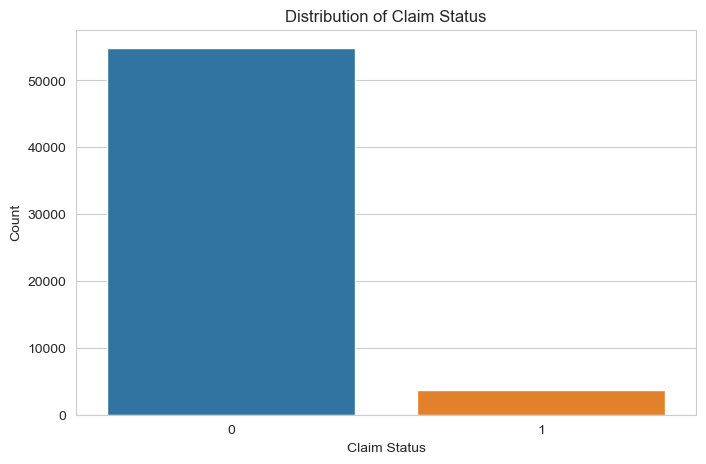

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=data)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

The distribution of the claim_status shows a significant imbalance between the
classes, with much fewer claims (1) compared to no claims (0). This imbalance will 
be a challenge to address during the model training phase to ensure our model does not become biased toward predicting the majority class.

Next, we will perform an analysis of both numerical and categorical features to 
understand their distributions and relationships with the claim_status. Let's start 
by examining the distributions of some key numerical features such as 
subscription_length, vehicle_age, and customer_age:

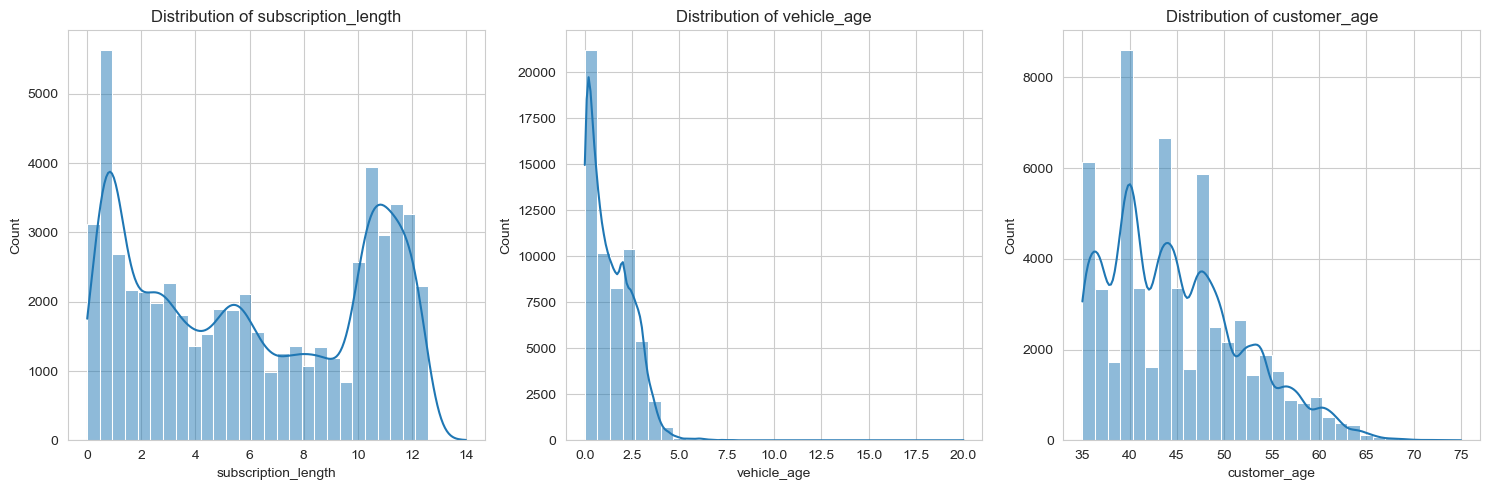

In [7]:
# selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# plotting distributions of numerical features
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

The distributions of the numerical features subscription_length, vehicle_age and
customer_age show the following characteristics:

subscription_length: Most values are clustered around lower numbers, indicating that
many policies have shorter subscription lengths.

vehicle_age: This distribution is somewhat uniform but with spikes at specific 
ages, possibly representing common vehicle age intervals in the dataset.

customer_age: This shows a fairly normal distribution, with the majority of 
customers falling within a middle-age range.

Now, we will analyze relevant categorical features to understand their variation 
and relationship with the claim_status. I'll focus on features like region_code, 
segment, and fuel type:

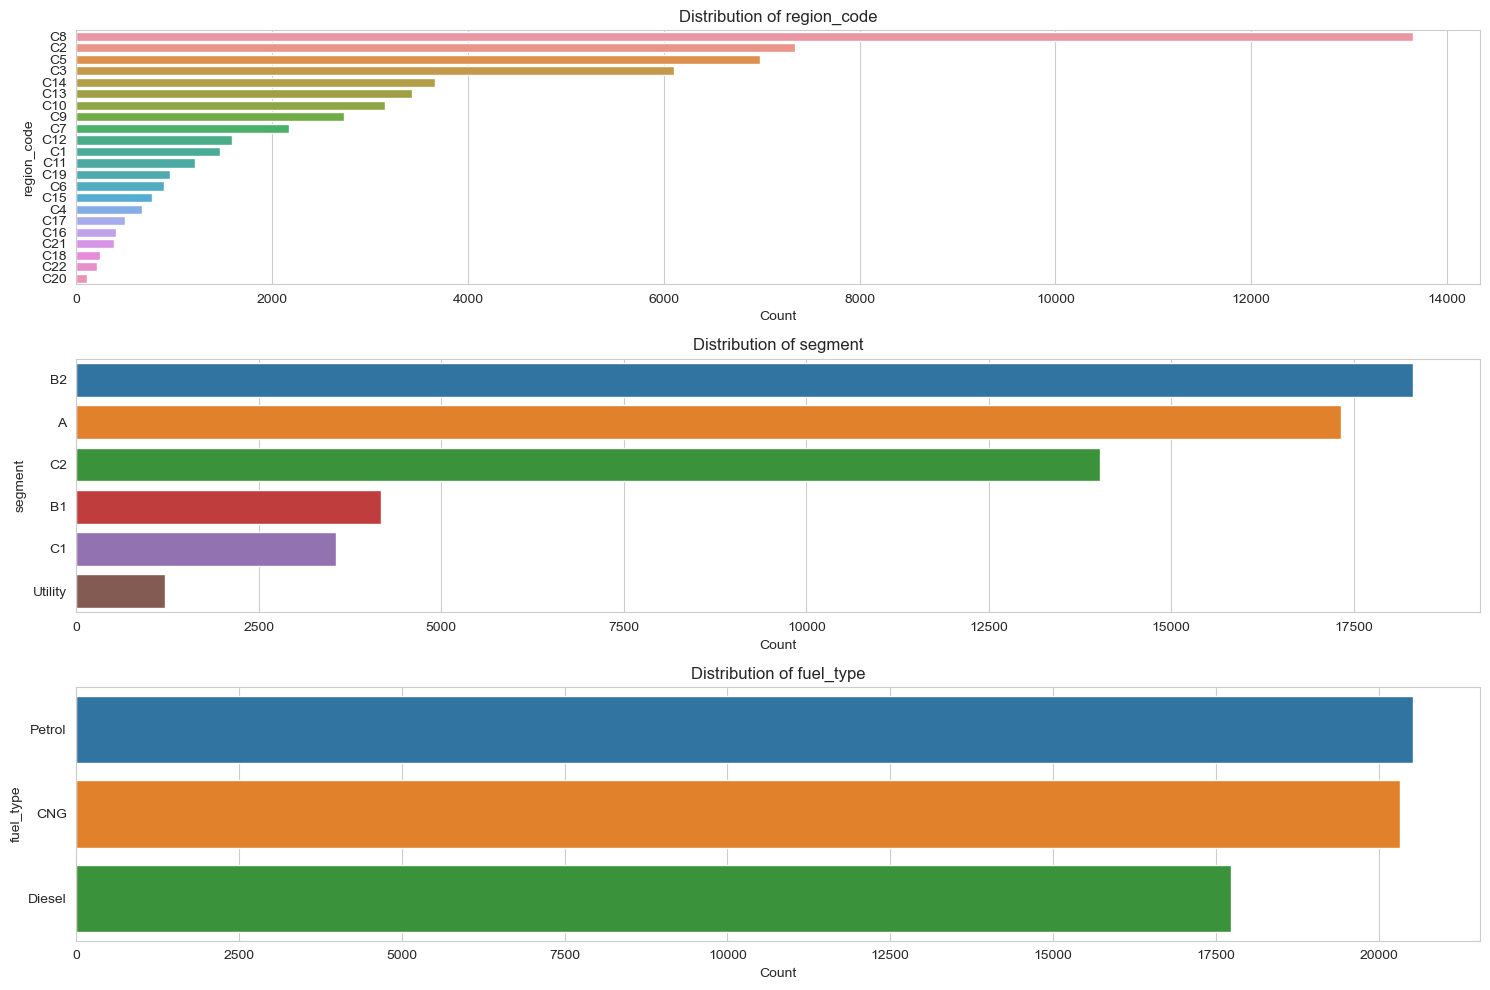

In [8]:
# selecting the relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

For 'region_code', there is a wide variety of codes, each with varying counts, but
a few specific codes dominate with much higher counts than others. In the 'segment' distribution, there are few categories, with the 'B2' segment being the most 
frequent category, followed by 'A' and 'C2', and the 'Utility' segment being the least common. Lastly, 'fuel_type' shows three categories: 'Petrol' has the highest count than CNG and Diesel.

## Handling Class Imbalance

The next step is to balance the dataset using oversampling to handle the class 
imbalance observed in the claim_status. 
Let's proceed with balancing the classes:

In [9]:
from sklearn.utils import resample

# seperate majority and minority classes
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

# oversample the minority class
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

# combine majority class with oversampled minority class 
oversampled_data = pd.concat([majority, minority_oversampled])

# check the distribution of undersampled and oversampled 
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

After performing oversampling on the minority class, both classes are balanced with
54,844 entries each. Now, let's have a look at some key variables to see what the 
balanced data looks like:

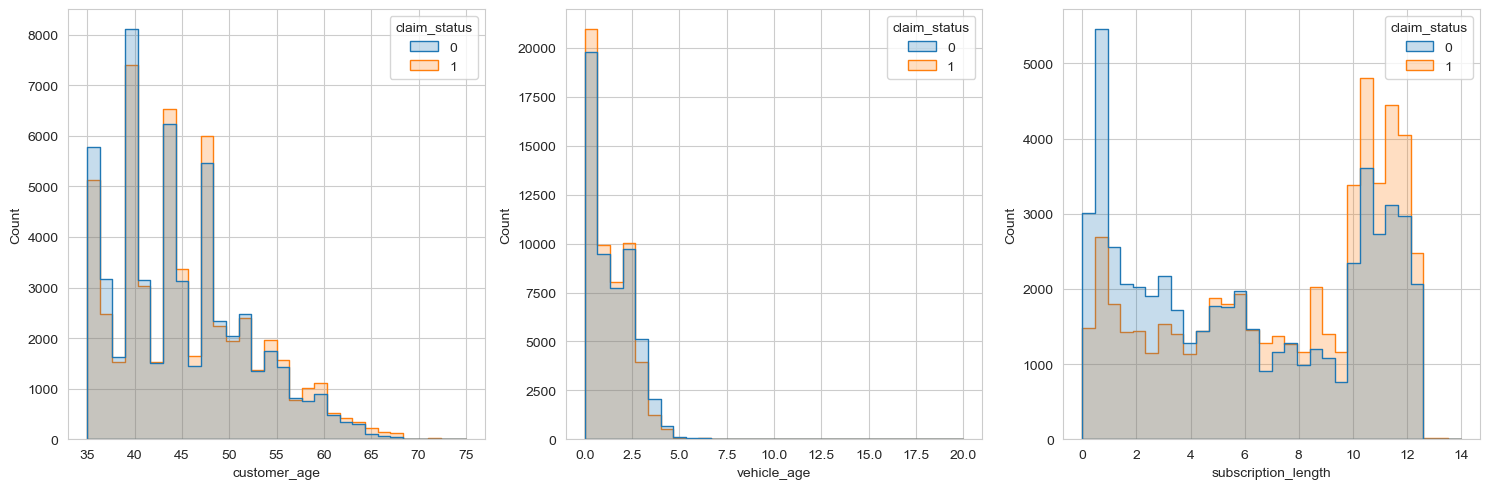

In [10]:
# plotting the distribution of 'customer_age', 'vehicle_age' and 'subscription_length' with respect to 'claim_status'
plt.figure(figsize=(15, 5))

# 'customer_age' distribution
plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)

# 'vehicle_age' distribution
plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)

# 'subscription_length' distribution
plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)

plt.tight_layout()
plt.show()

The oversampled data does look like the original data. So, let's move forward.

## Feature Selection

Now, we will identify the most frequent variables for predicting insurance frequency claims. It involves analyzing both categorical and numerical
features to determine their impact on the target variable. We will use feature importance techniques suitable for both types of variables. Let's 
start with feature selection to identify the most important variables:

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode Categorical variables
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# separate features and target variables
X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

# create a random forest classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# get feature importance
feature_importance = rf_model.feature_importances_

# create a dataframe for visulization for feature importance
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False) 

print(features_df.head(10)) # displaying the top 10 important features

                Feature  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


The top 10 most important variable for predicting insurance frequncy claims, according to the Random Forest model, are:

policy_id : Unique identifier for insurance policy
subscription_length : Length of the insurance subscription
customer_age : Age of the customer
vehicle_age : Age of the vehicle
region_density : Population density of the region
region_code : Code representing the region
model : Model of the vehicle
length : Length of the vehicle
gross_weight : Gross weight of the vehicle
engine_type : Type of the engine

These variables appear to have the most influence on the likelihood of an insurance claim being made. However, it's notable that policy_id has a very
high importance, which might not be intuitively relevant for the prediction. So, we need to make sure to drop the policy_id column while model training

## Model Training

The next step is to build a predictive model using oversampled data. Given the nature of the task (binary classification), a suitable algorithm could 
be logistic regression, random forest, or gradient boost. Considering the effectiveness of random forests in handling both numerical and categorical  data and their ability to model complex interactions, we'll proceed with a Random Forest Classifier:

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# drop 'Policy_id' column from the data
oversampled_data = oversampled_data.drop('policy_id', axis=1)

# prepare the oversampled data
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

# encoding categorical columns
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

# create and train the Random Forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

# predictions
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



The classification report above provides various metrics to evaluate the performance of the predictive model on the test data. Here's an 
interpretation of the results:
1. For class 0 (no claim), precision is 1.00, meaning that when the model predicts no claim, it is correct 100% of the time. For class 1 (claim), 
precision is 0.96, indicating that when the model predicts a claim, it is correct 96% of the time.
2. For class 0, recall is 0.96, signifying that the model correctly identifies 96% of all actual no-claim instances. For class 1, recall is 1.00, 
showing that the model correctly identifies 100% of all actual claim instances.
3. The F1-score for both classes is 0.98, indicating a high balance between precision and recall. It means the model is both accurate and reliable in 
its predictions across both classes. 
4. The overall accuracy of the model is 98%, which means it correctly predicts the claim status 98% of the cases in the test dataset.
5. The macro average for precision, recall and F1-score is 0.98, reflecting the average performance of the model across both classes without 
considering the imbalance in class distribution. This high vlue suggests that the model performs well across both the classes. The weighted average
for precision, recall and F1-score is also 0.99, taking into account the imbalance in the class distribution. It indicates that on average, the model
performs consistently well across the different classes when considering their distribution in the dataset.

These results indicate a highly effective model for predicting insurance claims, with strong performance metrics across both classes of outcomes. The high recall for claims (class 1) is particularly notable as it implies that the model is very effective at identifying the instances where claims occur, which is often the primary concern in imbalanced datasets.

Now, let's label the original imbalanced data using our model to see how many instances are correctly classified from our model:

In [13]:
original_encoded = data.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions})

print(comparison_df.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


Let's visualize the percentage of correctly classified and misclassified sampled:

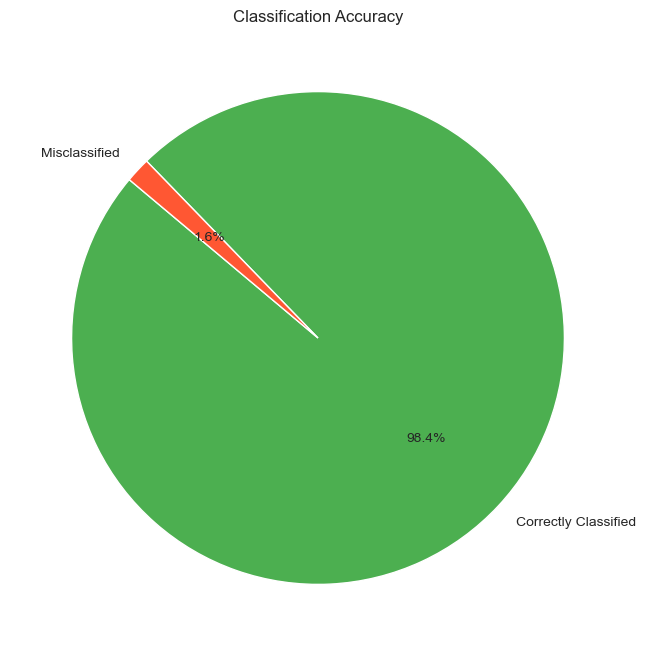

In [15]:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Classification Accuracy')
plt.show()

So we can see that our model performs well on the original imbalanced dataset as well.

## Summary

So, this is how to handle class imbalance and perform classification on imbalanced data. Imbalanced data refers to a situation in classification probelms where the number of observations in each class differs significantly. In such datasets, one class (the majority class) vastly outnumbers the other class (the minority class). This imbalance can lead to biased models that favor the majority class, resulting in poor predictive performance on the minority class, which is often the class of greater interest.